In [ ]:
# Deletes the first 5 rows from .txt file because they contain useless information.
# Then save it to a new file.

file = open('games_original.txt', "r")
lines = file.readlines()
file.close()

for i in range(5):
    del lines[0]

new_file = open("games.txt", "w+")

for line in lines:
    new_file.write(line)
new_file.close()

In [26]:
# DO NOT WORRY THIS STEP TAKES A LOT OF TIME BECAUSE OF THE FILE SIZE(2.5GB).
# Reading in the data and converting it to a Pandas dataframe.

import pandas as pd

raw_data = pd.read_csv('games.txt', delimiter=" ### ", header=None)

column_names = ["#", "date", "result", "welo", "belo", "len", "date_c", "resu_c", "welo_c", "belo_c", "edate_c", "setup", "fen", "resu2_c", "oyrange", "bad_len", "DELETE THIS"]
data = pd.DataFrame(raw_data[0].str.split(" ").to_list(), columns=column_names)

data.drop(['DELETE THIS'], axis=1, inplace=True)

data = pd.concat([data, raw_data[1]], axis=1)
data = data.rename(columns = {1: 'moves'}, inplace = False)
data['len'] = data['len'].astype(int)
data.head(5)

<ipython-input-26-54093da0ad98>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_data = pd.read_csv('games.txt', delimiter=" ### ", header=None)


,#,date,result,welo,belo,len,date_c,resu_c,welo_c,belo_c,edate_c,setup,fen,resu2_c,oyrange,bad_len,moves
0,1,2000.03.14,1-0,2851,None,67,date_false,result_false,welo_false,belo_true,edate_true,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.d4 B1.d5 W2.c4 B2.e6 W3.Nc3 B3.Nf6 W4.cxd5 ...
1,2,2000.03.14,1-0,2851,None,53,date_false,result_false,welo_false,belo_true,edate_true,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
2,3,1999.11.20,1-0,2851,None,57,date_false,result_false,welo_false,belo_true,edate_false,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bc4 B3.Bc5 W4.c3 ...
3,4,1999.11.20,1-0,2851,None,49,date_false,result_false,welo_false,belo_true,edate_false,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
4,5,2000.02.20,1/2-1/2,2851,2633,97,date_false,result_false,welo_false,belo_false,edate_false,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bb5 B3.a6 W4.Ba4 ...


In [34]:
data.columns

Index(['#', 'date', 'result', 'welo', 'belo', 'len', 'date_c', 'resu_c',
       'welo_c', 'belo_c', 'edate_c', 'setup', 'fen', 'resu2_c', 'oyrange',
       'bad_len', 'moves'],
      dtype='object')

In [35]:
import numpy as np

# Data cleaning.
# Removing columns and rows that are useless to use.
data.drop(data[data["setup"] != "setup_false"].index, inplace=True)
data.drop(['resu_c', 'welo_c', 'belo_c', 'setup', 'fen', 'oyrange', 'bad_len', 'resu2_c', 'edate_c', 'date_c'], axis=1, inplace=True)
data.drop(data[data.result == "*"].index, inplace=True) # Remove all rows where the result is "*", meaning that the result is corrupted or missing.
data.drop(data[data.len < 4].index, inplace=True) # Removing all rows where the len is smaller than 4.

# Changing datatypes
data.welo = data.welo.replace("None", np.nan)
data.belo = data.belo.replace("None", np.nan)
data.welo = data.welo.astype("float")
data.belo = data.belo.astype("float")

data.head()

,#,date,result,welo,belo,len,moves
0,1,2000.03.14,1-0,2851.0,NaN,67,W1.d4 B1.d5 W2.c4 B2.e6 W3.Nc3 B3.Nf6 W4.cxd5 ...
1,2,2000.03.14,1-0,2851.0,NaN,53,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
2,3,1999.11.20,1-0,2851.0,NaN,57,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bc4 B3.Bc5 W4.c3 ...
3,4,1999.11.20,1-0,2851.0,NaN,49,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
4,5,2000.02.20,1/2-1/2,2851.0,2633.0,97,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bb5 B3.a6 W4.Ba4 ...


In [50]:
## Suure dataseti subset. Lihtsam jooksutada erinevaid algosid jne.
mini = data.head(1000)

In [ ]:
#MITTE KUSTUTADA
#PRIIT PÄRN TEGELEB SELLEGA
data_copy = data.copy(deep=True)
data_copy.drop(['date', 'welo', 'belo', 'len'], axis=1, inplace=True)
data_copy.drop(data_copy[data_copy.result == "1/2-1/2"].index, inplace=True) # Remove all rows where the game ended in a draw.
data_copy.head()

In [ ]:
#MITTE KUSTUTADA
#PRIIT PÄRN TEGELEB SELLEGA
winnersMoves = []
for index, row in data_copy.iterrows():
    if (row['result'] == "1-0"): # If the white player won.
        movesWithQueue = row['moves'].split(" ")
        moves = ""
        i = 0
        for moveWithQueue in movesWithQueue:
            if (i == 5):
                break
            if (moveWithQueue[0] == "W"):
                move = moveWithQueue.split(".")
                moves += " "
                moves += move[1]
                i += 1
        winnersMoves.append(moves)
    else: # If the black player won.
        movesWithQueue = row['moves'].split(" ")
        moves = ""
        j = 0
        for moveWithQueue in movesWithQueue:
            if (j == 5):
                break
            if (moveWithQueue[0] == "B"):
                move = moveWithQueue.split(".")
                moves += " "
                moves += move[1]
                j += 1
                
        winnersMoves.append(moves)

winnerMovesDataFrame = pd.DataFrame(data=winnersMoves, columns = ['Moves'])
winnerMovesDataFrame.head()

print(winnerMovesDataFrame["Moves"].value_counts())

0-500
501-1000
1001-1500
1501-2000
2001-2500
2501-3000
[0.40268456375838924, 0.5581395348837209, 0.4566929133858268, 0.47, 0.5153846153846153, 0.631578947368421, 0.6666666666666666, 0.6363636363636364, 0.6, 0.0, 1.0]


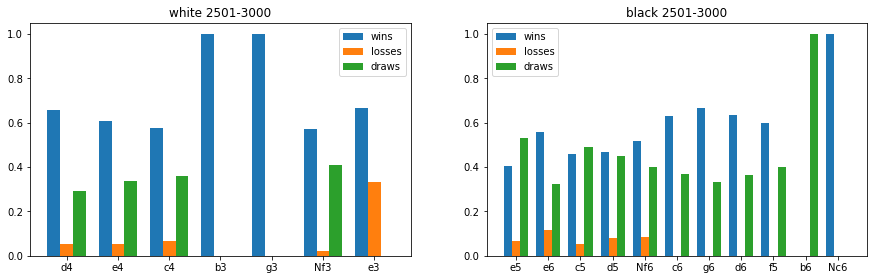

In [86]:
## JOOOOOOOOOSEP TEB 

from matplotlib import rcParams
import matplotlib.pyplot as plt

## Goal 4: Find out the main differences in moves according to elo.

rcParams["figure.figsize"] = 15, 30
subplot_index = 1
elo_ranges = [[0, 500], [501, 1000], [1001, 1500], [1501, 2000], [2001, 2500], [2501, 3000]]

for elo_range in elo_ranges:
    min_elo = elo_range[0]
    max_elo = elo_range[1]
    elo = str(min_elo) + "-" + str(max_elo)
    print(elo)
    
    if min_elo != 2501:
        continue
    
    white_moves = []
    white_results = []
    black_moves = []
    black_results = []

    for index, row in mini.iterrows():
        if row.welo >= min_elo and row.welo < max_elo:
            first_move = row.moves.split(" ")[0].split(".")[1] # white's move
            result = row.result
            white_moves.append(first_move)
            white_results.append(result)
        if row.belo >= min_elo and row.belo < max_elo:
            first_move = row.moves.split(" ")[1].split(".")[1] # black's move
            result = row.result
            black_moves.append(first_move)
            black_results.append(result)
    
    white_moves_df = pd.DataFrame({"result": white_results, "move": white_moves})
    white_moves = white_moves_df.move.unique()
    white_winrates = pd.DataFrame({"wins": [len(white_moves_df[(white_moves_df["move"]==move) & (white_moves_df["result"]=="1-0")]) for move in white_moves],
                             "losses": [len(white_moves_df[(white_moves_df["move"]==move) & (white_moves_df["result"]=="0-1")]) for move in white_moves],
                             "draws": [len(white_moves_df[(white_moves_df["move"]==move) & (white_moves_df["result"]=="1/2-1/2")]) for move in white_moves],
                                  "total_games": [len(white_moves_df[(white_moves_df["move"]==move)])for move in white_moves]},
                            index=white_moves)
    
    black_moves_df = pd.DataFrame({"result": black_results, "move": black_moves})
    black_moves = black_moves_df.move.unique()
    black_winrates = pd.DataFrame({"wins": [len(black_moves_df[(black_moves_df["move"]==move) & (black_moves_df["result"]=="1-0")])for move in black_moves],
                             "losses": [len(black_moves_df[(black_moves_df["move"]==move) & (black_moves_df["result"]=="0-1")])for move in black_moves],
                             "draws": [len(black_moves_df[(black_moves_df["move"]==move) & (black_moves_df["result"]=="1/2-1/2")])for move in black_moves],
                                  "total_games": [len(black_moves_df[(black_moves_df["move"]==move)])for move in black_moves]},
                            index=black_moves)
        
    # Plot for white
    width = 0.25
    bars1 = np.arange(len(white_moves))
    bars2 = [x + width for x in bars1]
    bars3 = [x + width for x in bars2]
    
    wins = [row.wins / row.total_games for idx,row in white_winrates.iterrows()]
    losses = [row.losses / row.total_games for idx,row in white_winrates.iterrows()]
    draws = [row.draws / row.total_games for idx,row in white_winrates.iterrows()]
    
    # Sketchy but maybe works
    if not wins:
        wins = [0]
    if not losses:
        losses = [0]
    if not draws:
        draws = [0]
        
    plt.subplot(6, 2, subplot_index)
    plt.bar(bars1, wins, width=width, label="wins")
    plt.bar(bars2, losses, width=width, label="losses")
    plt.bar(bars3, draws, width=width, label="draws")
    plt.title("white " + elo)
    plt.xticks([x + width for x in range(len(white_moves))], white_moves)
    subplot_index += 1
    plt.legend()
    
    # Plot for black
    width = 0.25
    bars1 = np.arange(len(black_moves))
    bars2 = [x + width for x in bars1]
    bars3 = [x + width for x in bars2]

    wins = [row.wins / row.total_games for idx,row in black_winrates.iterrows()]
    losses = [row.losses / row.total_games for idx,row in black_winrates.iterrows()]
    draws = [row.draws / row.total_games for idx,row in black_winrates.iterrows()]
    
    # Sketchy but maybe works
    if not wins:
        wins = [0]
    if not losses:
        losses = [0]
    if not draws:
        draws = [0]
        
    print(wins)
    plt.subplot(6, 2, subplot_index)
    plt.bar(bars1, wins, width=width, label="wins")
    plt.bar(bars2, losses, width=width, label="losses")
    plt.bar(bars3, draws, width=width, label="draws")
    plt.title("black " + elo)
    plt.xticks([x + width for x in range(len(black_moves))], black_moves)
    subplot_index += 1
    plt.legend()

In [87]:
print(white_winrates)

## Võiks välja jätta käigud, mida on tehtud vähem kui 5%

     wins  losses  draws  total_games
d4    255      20    113          388
e4    298      27    166          491
c4     35       4     22           61
b3      3       0      0            3
g3      5       0      0            5
Nf3    28       1     20           49
e3      2       1      0            3
